## Dataset generation from deformable mirror

A Parabolic GRIN fiber or a Step-Index fiber can be used

### Imports

In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.datasets import SimulatedGrinSpeckleOutputDataset, SimulatedStepIndexSpeckleOutputDataset, SimulatedSpeckleOutputDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Setup

Set the computation grid and the fiber characteristics

In [16]:
fiber_type: str = 'step' # 'grin' or 'step'
grid_settings: dict = {'pixel_size': 1e-6, 'pixel_numbers': (64, 64)}
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.44839}
dataset_settings: dict = {'length': 10000, 'degen': True, 'phases_dim': (8, 8)}
fourier_settings: dict = {'pad': 1}
export_settings: dict = {'return_output_fields': True, 'add_exp_noise': False, 'noise_func': np.median, 'file_type': 'matlab'}

### Dataset generation

Generate the grid and the fiber

In [17]:
grid = Grid(**grid_settings)

if fiber_type.lower() in ['grin']:
    fiber = GrinFiber(**fiber_settings)
elif fiber_type.lower() in ['step', 'si']:
    fiber = StepIndexFiber(**fiber_settings)
else:
    raise ValueError(f"Unknown fiber type.")
print(fiber)

StepIndexFiber instance with:
  - Radius: 25.0 um
  - Core index: 1.465
  - Cladding index: 1.44839
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.220
  - Number of guided LP modes: 140
  - Number of guided LP modes (counting degenerates): 269
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46491477  0.          0.          1.        ]
 [ 1.46478363  2.          1.          1.        ]
 [ 1.46461132  4.          2.          1.        ]
 [ 1.46455097  1.          0.          2.        ]
 [ 1.46440012  6.          3.          1.        ]
 [ 1.46427477  3.          1.          2.        ]
 [ 1.46415143  8.          4.          1.        ]
 [ 1.46395609  5.          2.          2.        ]
 [ 1.46389667  2.          0.          3.        ]
 [ 1.46386618 10.          5.          1.        ]]


Compute and store the modes for a much faster dataset generation, plot one for checking extent

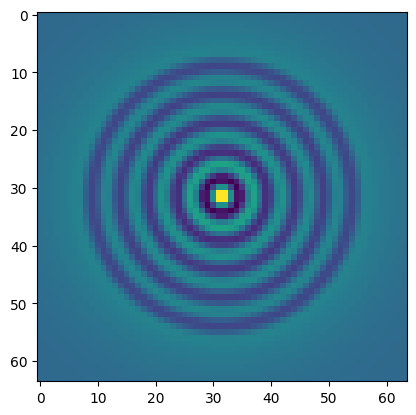

In [18]:
fiber.compute_modes_fields(grid)
plt.imshow(fiber._modes[:,:,1,-1])

Compute dataset

In [19]:
dset = SimulatedStepIndexSpeckleOutputDataset(fiber, grid, N_modes=fiber._N_modes_degen, length=dataset_settings['length'])
# dset = SimulatedStepIndexSpeckleOutputDataset(fiber, grid, N_modes=fiber._N_modes_degen, length=10)
dset.compute_from_transfer_matrix(phases_dim=dataset_settings['phases_dim'])
dset.compute_fourier_transforms(**fourier_settings)

Found 12 input variable weights below threshold 0.001 to delete.
Successfully deleted low weight input variables.
Computed TM row 1/52
Computed TM row 2/52
Computed TM row 3/52
Computed TM row 4/52
Computed TM row 5/52
Computed TM row 6/52
Computed TM row 7/52
Computed TM row 8/52
Computed TM row 9/52
Computed TM row 10/52
Computed TM row 11/52
Computed TM row 12/52
Computed TM row 13/52
Computed TM row 14/52
Computed TM row 15/52
Computed TM row 16/52
Computed TM row 17/52
Computed TM row 18/52
Computed TM row 19/52
Computed TM row 20/52
Computed TM row 21/52
Computed TM row 22/52
Computed TM row 23/52
Computed TM row 24/52
Computed TM row 25/52
Computed TM row 26/52
Computed TM row 27/52
Computed TM row 28/52
Computed TM row 29/52
Computed TM row 30/52
Computed TM row 31/52
Computed TM row 32/52
Computed TM row 33/52
Computed TM row 34/52
Computed TM row 35/52
Computed TM row 36/52
Computed TM row 37/52
Computed TM row 38/52
Computed TM row 39/52
Computed TM row 40/52
Computed TM row

### Dataset checking and export

Display a random draw from the dataset as a check

Text(0.5, 1.0, 'Far field intensity')

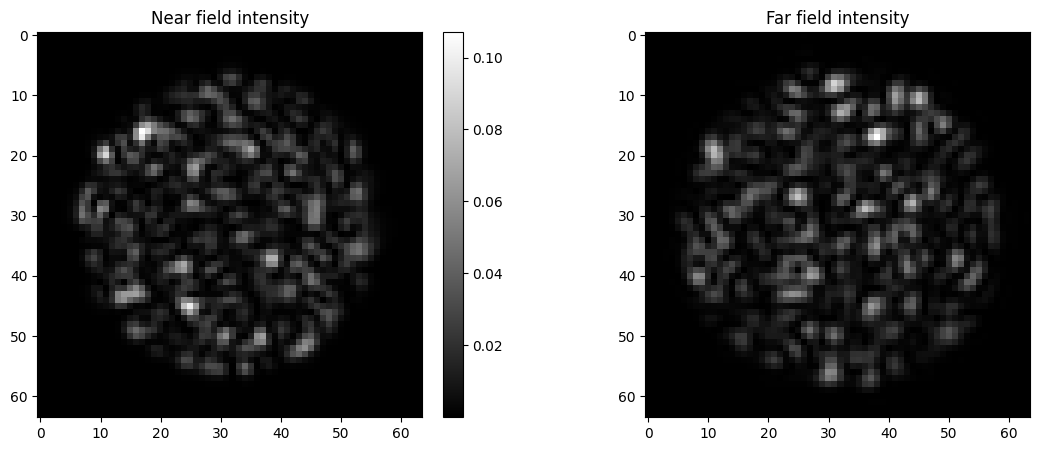

In [20]:
rand_idx = np.random.randint(0, dset._fields.shape[-1])

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
nf = axs[0].imshow(dset.intensities[..., rand_idx], cmap='gray')
ff = axs[1].imshow(np.square(np.abs(dset._transf[..., rand_idx])), cmap='gray')
plt.colorbar(nf, ax=axs[0], fraction=0.046, pad=0.04)
# plt.colorbar(ff, ax=axs[1], fraction=0.046, pad=0.04)
axs[0].set_title('Near field intensity')
axs[1].set_title('Far field intensity')

Export it if it looks ok

In [21]:
dset.export(**export_settings)

Dataset saved: .\synth_dset_step_lambda=1064nm_Nmodes=269_degen=True_len=20000_mirr=64_exp_noise.mat
